# Breast Cancer Dataset Analysis

# Summary :-This is an analysis of the Breast Cancer Wisconsin (Diagnostic) DataSet, obtained from Kaggle We are going to analyze it and to try several machine learning classification models to compare their results.

In [1]:
# Lets import some packages. 
# This were included during experimentation.
library('needs')
needs(readr,
      dplyr,
      ggplot2,
      corrplot,
      gridExtra,
      pROC,
      MASS,
      caTools,
      caret,
      caretEnsemble)
      #doMC)
#registerDoMC(cores = 3)


Load `package:needs` in an interactive session to set auto-load flag




In [2]:
#library('needs')

In [3]:
# Lets read the  Breast Cancer dataset
data <- read.csv("datasets_180_408_data.csv")
head(data,5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst,X
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NA
2,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NA
3,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NA
4,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NA
5,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NA


__The meaning of each variable is described below:

id: ID number

diagnosis: The diagnosis of breast tissues (M = malignant, B = benign)

radius_mean: mean of distances from center to points on the perimeter

texture_mean: standard deviation of gray-scale values

perimeter_mean: mean size of the core tumor

area_mean: (no description provided)

smoothness_mean: mean of local variation in radius lengths

compactness_mean: mean of perimeter^2 / area - 1.0

concavity_mean: mean of severity of concave portions of the contour

concave points_mean: mean for number of concave portions of the contour

symmetry_mean: (no description provided)

fractal_dimension_mean: mean for "coastline approximation" - 1

radius_se: standard error for the mean of distances from center to points on the perimeter

texture_se: standard error for standard deviation of gray-scale values

perimeter_se: (no description provided)

area_se: (no description provided)

smoothness_se: standard error for local variation in radius lengths

compactness_se: standard error for perimeter^2 / area - 1.0

concavity_se: standard error for severity of concave portions of the contour

concave points_se: standard error for number of concave portions of the contour
concave points_se: standard error for number of concave portions of the contour

symmetry_se: (no description provided)

fractal_dimension_se: standard error for "coastline approximation" - 1

radius_worst: "worst" or largest mean value for mean of distances from center to points on the perimeter

texture_worst: "worst" or largest mean value for standard deviation of gray-scale values

perimeter_worst: (no description provided)

area_worst: (no description provided)

smoothness_worst: "worst" or largest mean value for local variation in radius lengths

compactness_worst: "worst" or largest mean value for perimeter^2 / area - 1.0

concavity_worst: "worst" or largest mean value for severity of concave portions of the contour concave

points_worst: "worst" or largest mean value for number of concave portions of the contour

symmetry_worst: (no description provided)

fractal_dimension_worst: "worst" or largest mean value for "coastline approximation" - 1__


In [4]:
# How many number of rows are there in the dataset?
nrow(data)

[1] 569

In [5]:
# How many number of columns are there in the dataset?
ncol(data)

[1] 33

In [6]:
# Can you tell me the dimensions?
dim(data)

[1] 569  33

In [7]:
# What is the class of the columns in the dataframe?
str(data)

'data.frame':	569 obs. of  33 variables:
 $ id                     : int  842302 842517 84300903 84348301 84358402 843786 844359 84458202 844981 84501001 ...
 $ diagnosis              : chr  "M" "M" "M" "M" ...
 $ radius_mean            : num  18 20.6 19.7 11.4 20.3 ...
 $ texture_mean           : num  10.4 17.8 21.2 20.4 14.3 ...
 $ perimeter_mean         : num  122.8 132.9 130 77.6 135.1 ...
 $ area_mean              : num  1001 1326 1203 386 1297 ...
 $ smoothness_mean        : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ compactness_mean       : num  0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ concavity_mean         : num  0.3001 0.0869 0.1974 0.2414 0.198 ...
 $ concave.points_mean    : num  0.1471 0.0702 0.1279 0.1052 0.1043 ...
 $ symmetry_mean          : num  0.242 0.181 0.207 0.26 0.181 ...
 $ fractal_dimension_mean : num  0.0787 0.0567 0.06 0.0974 0.0588 ...
 $ radius_se              : num  1.095 0.543 0.746 0.496 0.757 ...
 $ texture_se             : num  0.905 0.734 0.787 1

 # Remove NULL Data

__Dataset has 33 columns but one is totally empty, so I removed it.__



__Target variable is a character-type variable, so it is recommended to convert it into a factor.__

In [8]:
data$diagnosis <- as.factor(data$diagnosis)
# the 33 column is not right
data[,33] <- NULL

In [9]:
# I want to know the descriptive ststistics.
summary(data)

       id            diagnosis  radius_mean      texture_mean  
 Min.   :     8670   B:357     Min.   : 6.981   Min.   : 9.71  
 1st Qu.:   869218   M:212     1st Qu.:11.700   1st Qu.:16.17  
 Median :   906024             Median :13.370   Median :18.84  
 Mean   : 30371831             Mean   :14.127   Mean   :19.29  
 3rd Qu.:  8813129             3rd Qu.:15.780   3rd Qu.:21.80  
 Max.   :911320502             Max.   :28.110   Max.   :39.28  
 perimeter_mean     area_mean      smoothness_mean   compactness_mean 
 Min.   : 43.79   Min.   : 143.5   Min.   :0.05263   Min.   :0.01938  
 1st Qu.: 75.17   1st Qu.: 420.3   1st Qu.:0.08637   1st Qu.:0.06492  
 Median : 86.24   Median : 551.1   Median :0.09587   Median :0.09263  
 Mean   : 91.97   Mean   : 654.9   Mean   :0.09636   Mean   :0.10434  
 3rd Qu.:104.10   3rd Qu.: 782.7   3rd Qu.:0.10530   3rd Qu.:0.13040  
 Max.   :188.50   Max.   :2501.0   Max.   :0.16340   Max.   :0.34540  
 concavity_mean    concave.points_mean symmetry_mean   

__To design a machine learning algorithm that is able to correctly classify whether the tumor is benign or malignant.__

In [10]:
#prop.table(table(data$diagnosis))

In [11]:
table(data$diagnosis)
prop.table(table(data$diagnosis))*100


  B   M 
357 212 


       B        M 
62.74165 37.25835 

# There is a great correlation between some variables

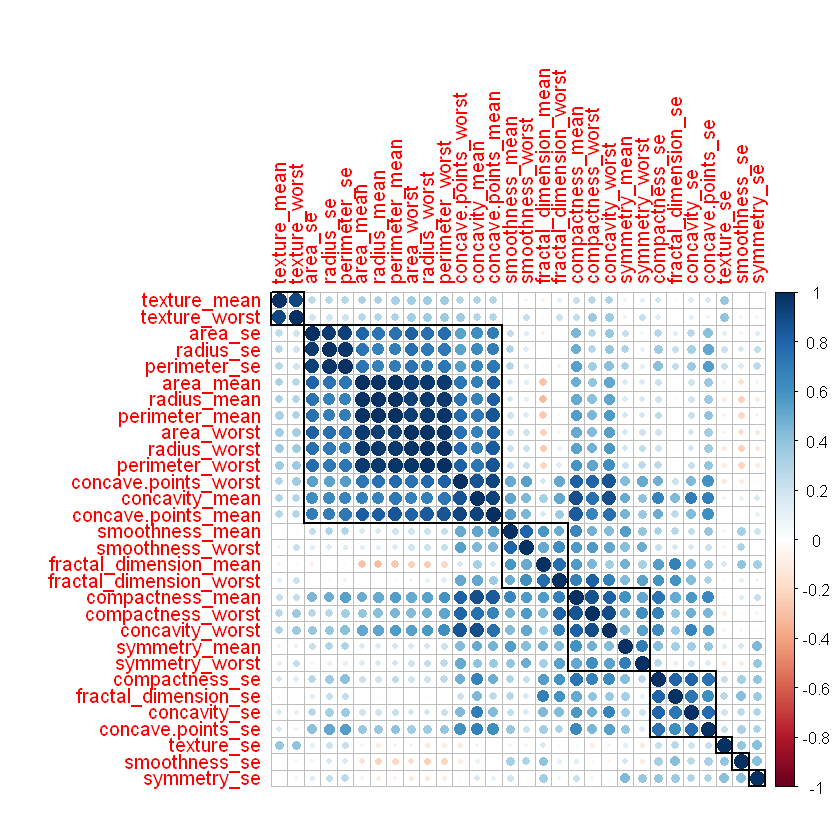

In [12]:
corr_mat <- cor(data[,3:ncol(data)])
corrplot(corr_mat, order = "hclust", tl.cex = 1, addrect = 8)

# Modeling

__We are going to get a training and a testing set to use when building some models__

In [13]:
set.seed(1234)
data_index <- createDataPartition(data$diagnosis, p=0.7, list = FALSE)
train_data <- data[data_index, -1]
test_data <- data[-data_index, -1]

__We will try some data transformations too in some models__

# Data preprocessing

__Because there are so much correlation some machine learning models can fail. We are going to create a PCA and LDA version of the data__ https://medium.com/machine-learning-researcher/dimensionality-reduction-pca-and-lda-6be91734f567

# PCA

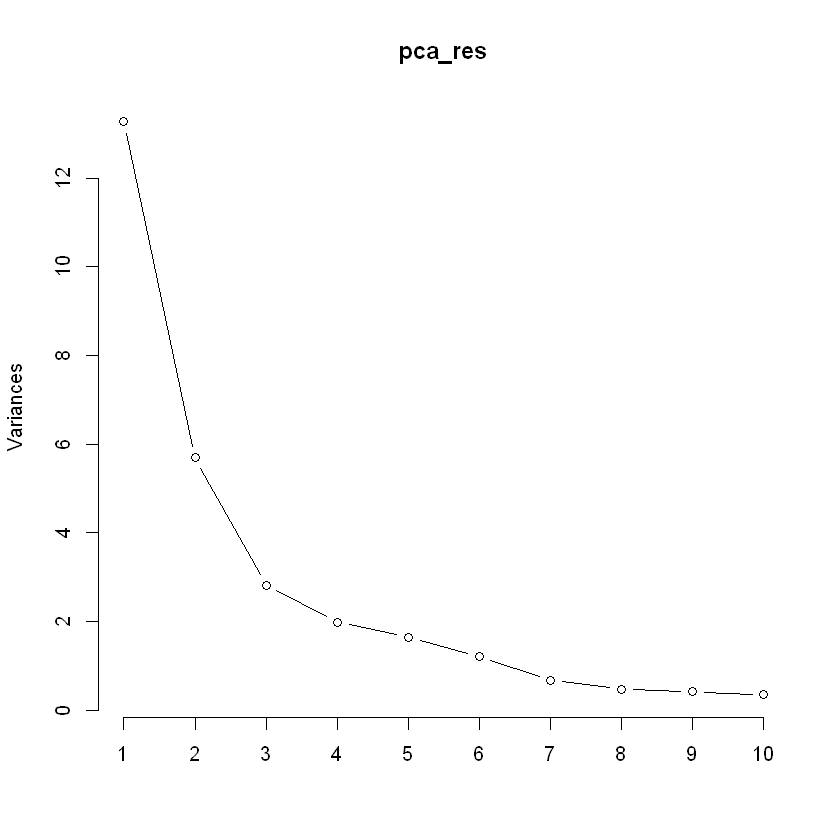

In [14]:
pca_res <- prcomp(data[,3:ncol(data)], center = TRUE, scale = TRUE)
plot(pca_res, type="l")

In [15]:
summary(pca_res)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     3.6444 2.3857 1.67867 1.40735 1.28403 1.09880 0.82172
Proportion of Variance 0.4427 0.1897 0.09393 0.06602 0.05496 0.04025 0.02251
Cumulative Proportion  0.4427 0.6324 0.72636 0.79239 0.84734 0.88759 0.91010
                           PC8    PC9    PC10   PC11    PC12    PC13    PC14
Standard deviation     0.69037 0.6457 0.59219 0.5421 0.51104 0.49128 0.39624
Proportion of Variance 0.01589 0.0139 0.01169 0.0098 0.00871 0.00805 0.00523
Cumulative Proportion  0.92598 0.9399 0.95157 0.9614 0.97007 0.97812 0.98335
                          PC15    PC16    PC17    PC18    PC19    PC20   PC21
Standard deviation     0.30681 0.28260 0.24372 0.22939 0.22244 0.17652 0.1731
Proportion of Variance 0.00314 0.00266 0.00198 0.00175 0.00165 0.00104 0.0010
Cumulative Proportion  0.98649 0.98915 0.99113 0.99288 0.99453 0.99557 0.9966
                          PC22    PC23   PC24 

__The two first components explains the 0.6324 of the variance. We need 10 principal components to explain more than 0.95 of the variance and 17 to explain more than 0.99__

In [16]:
library(gridExtra)

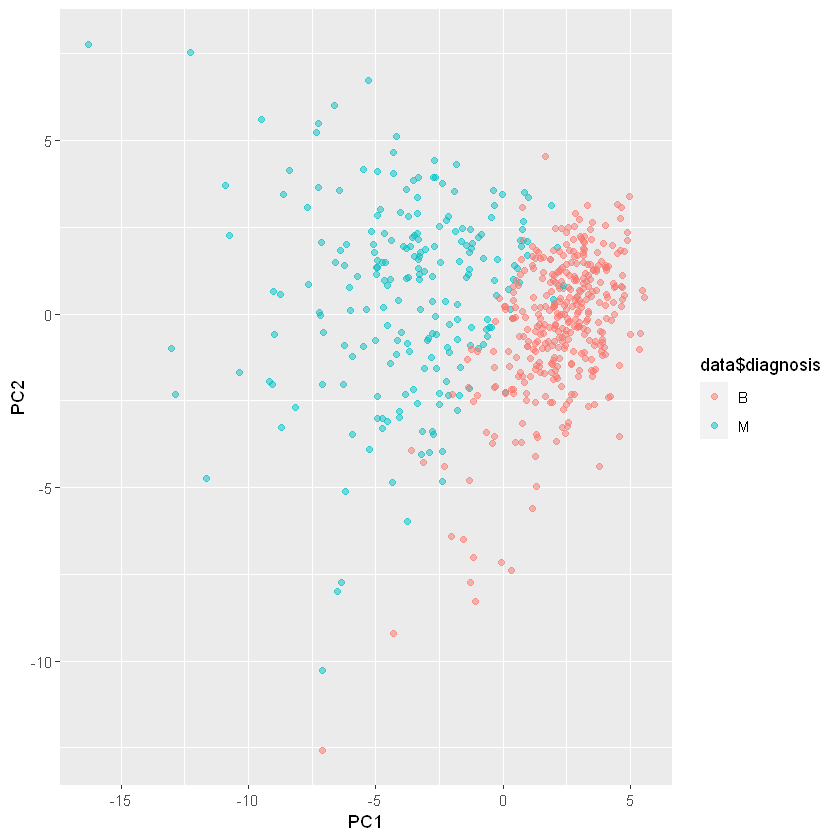

In [17]:
pca_df <- as.data.frame(pca_res$x)
ggplot(pca_df, aes(x=PC1, y=PC2, col=data$diagnosis)) + geom_point(alpha=0.5)


__The data can be easly separated.__

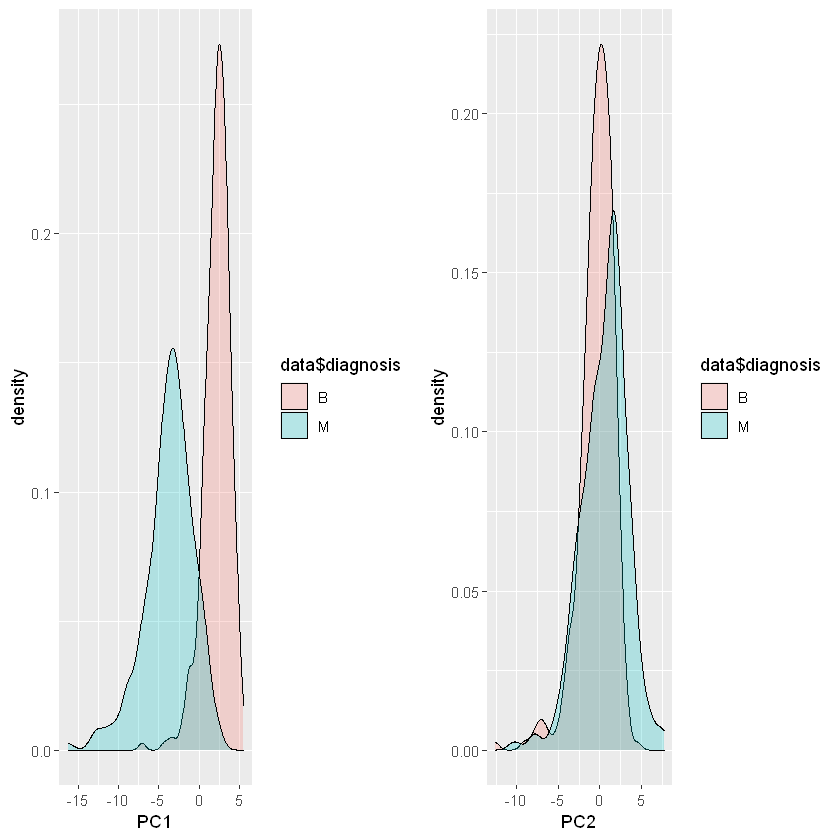

In [18]:
g_pc1 <- ggplot(pca_df, aes(x=PC1, fill=data$diagnosis)) + geom_density(alpha=0.25)  
g_pc2 <- ggplot(pca_df, aes(x=PC2, fill=data$diagnosis)) + geom_density(alpha=0.25)  
grid.arrange(g_pc1, g_pc2, ncol=2)

__We will use the caret preProcess to apply pca with a 0.99 threshold__

# LDA

__Let’s try LDA instead of PCA. LDA take in consideration the different classes and could get better results__

In [19]:
lda_res <- lda(diagnosis~., data, center = TRUE, scale = TRUE) 
lda_df <- predict(lda_res, data)$x %>% as.data.frame() %>% cbind(diagnosis=data$diagnosis)
lda_res

Call:
lda(diagnosis ~ ., data = data, center = TRUE, scale = TRUE)

Prior probabilities of groups:
        B         M 
0.6274165 0.3725835 

Group means:
        id radius_mean texture_mean perimeter_mean area_mean smoothness_mean
B 26543825    12.14652     17.91476       78.07541  462.7902      0.09247765
M 36818050    17.46283     21.60491      115.36538  978.3764      0.10289849
  compactness_mean concavity_mean concave.points_mean symmetry_mean
B       0.08008462     0.04605762          0.02571741      0.174186
M       0.14518778     0.16077472          0.08799000      0.192909
  fractal_dimension_mean radius_se texture_se perimeter_se  area_se
B             0.06286739 0.2840824   1.220380     2.000321 21.13515
M             0.06268009 0.6090825   1.210915     4.323929 72.67241
  smoothness_se compactness_se concavity_se concave.points_se symmetry_se
B   0.007195902     0.02143825   0.02599674       0.009857653  0.02058381
M   0.006780094     0.03228117   0.04182401       0.015060

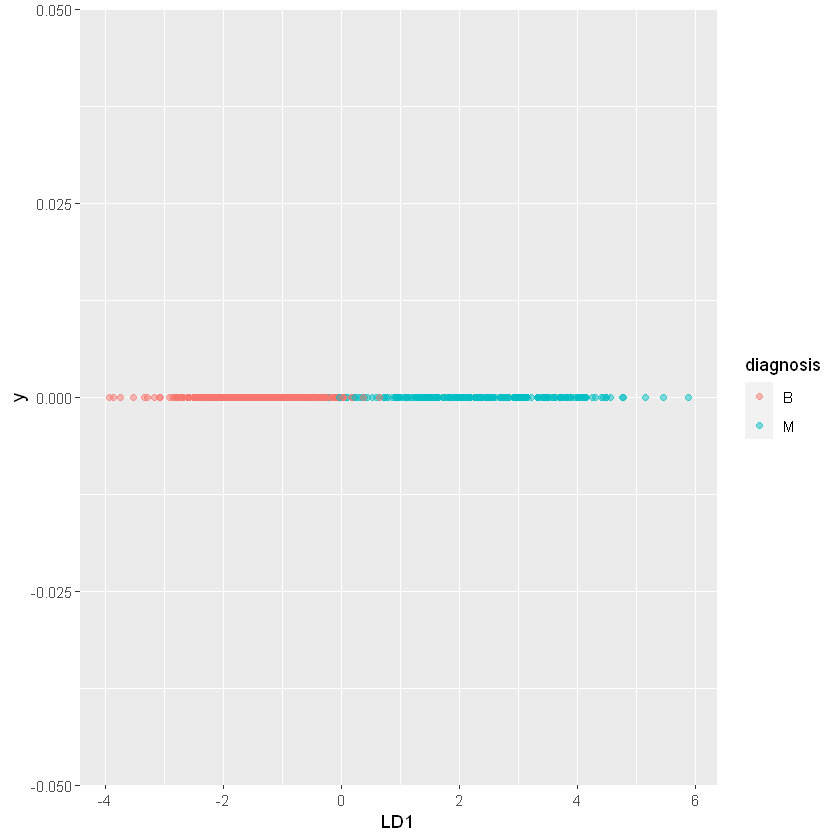

In [20]:
ggplot(lda_df, aes(x=LD1, y=0, col=diagnosis)) + geom_point(alpha=0.5)

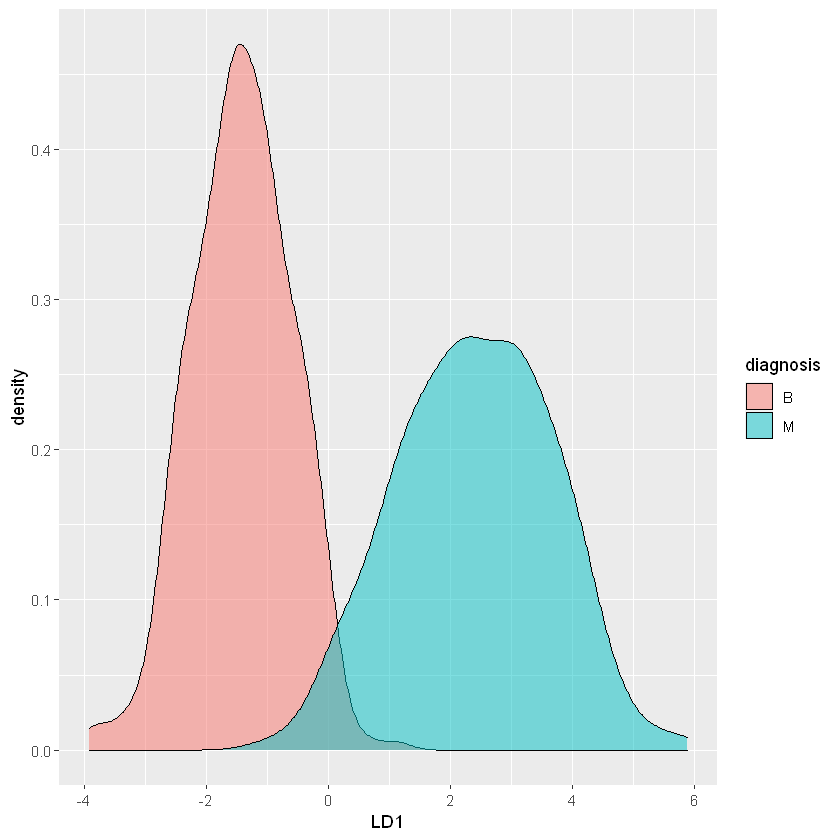

In [21]:
ggplot(lda_df, aes(x=LD1, fill=diagnosis)) + geom_density(alpha=0.5)


__We are going to create a training and test set of these data__

In [22]:
train_data_lda <- lda_df[data_index,]
test_data_lda <- lda_df[-data_index,]

# Applying machine learning models

In [23]:
fitControl <- trainControl(method="cv",
                            number = 5,
                            preProcOptions = list(thresh = 0.99), # threshold for pca preprocess
                            classProbs = TRUE,
                            summaryFunction = twoClassSummary)

# LDA

In [24]:
model_lda <- train(diagnosis~.,
                       train_data_lda,
                       method="lda2",
                       #tuneLength = 10,
                       metric="ROC",
                       preProc = c("center", "scale"),
                       trControl=fitControl)

In [25]:
pred_lda <- predict(model_lda, test_data_lda)
cm_lda <- confusionMatrix(pred_lda, test_data_lda$diagnosis, positive = "M")
cm_lda

Confusion Matrix and Statistics

          Reference
Prediction   B   M
         B 107   6
         M   0  57
                                          
               Accuracy : 0.9647          
                 95% CI : (0.9248, 0.9869)
    No Information Rate : 0.6294          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.9228          
                                          
 Mcnemar's Test P-Value : 0.04123         
                                          
            Sensitivity : 0.9048          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.9469          
             Prevalence : 0.3706          
         Detection Rate : 0.3353          
   Detection Prevalence : 0.3353          
      Balanced Accuracy : 0.9524          
                                          
       'Positive' Class : M               
                              

,B,M
B vs. M,0.9980715,0.9980715


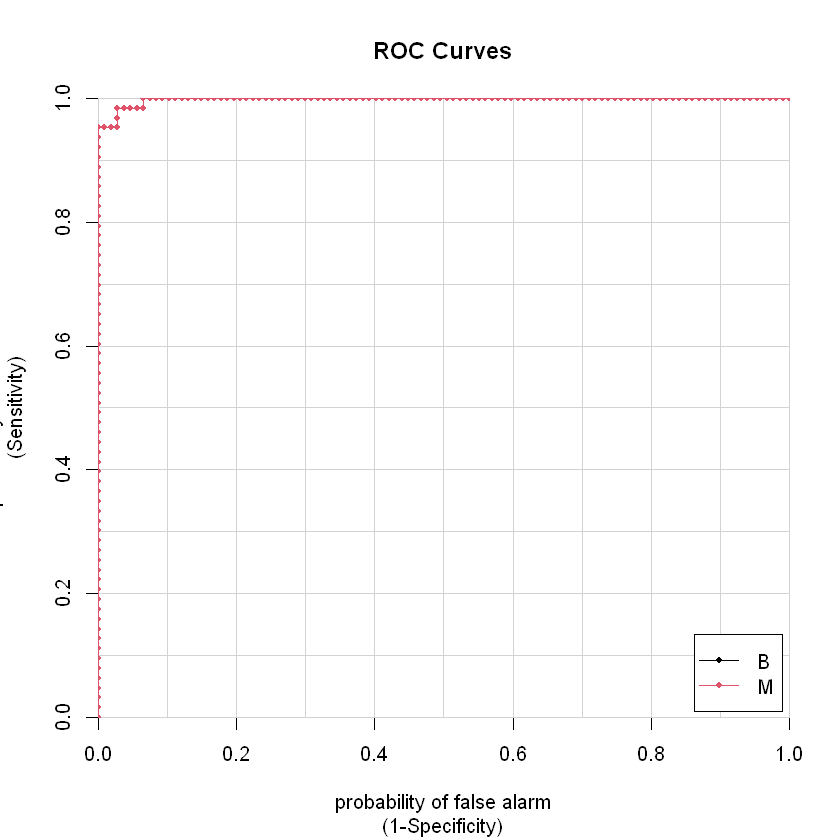

In [26]:
pred_prob_lda <- predict(model_lda, test_data_lda, type="prob")
#roc_lda <- roc(test_data_lda$diagnosis, pred_prob_lda$M)
#plot(roc_lda)
colAUC(pred_prob_lda, test_data_lda$diagnosis, plotROC=TRUE)


# Random Forest

In [27]:
#install.packages('ranger')

In [51]:
library('ranger')

In [52]:
model_rf <- train(diagnosis~.,
                  train_data,
                  method="ranger",
                  metric="ROC",
                  #tuneLength=10,
                  #tuneGrid = expand.grid(mtry = c(2, 3, 6)),
                  preProcess = c('center', 'scale'),
                  trControl=fitControl)

In [53]:
pred_rf <- predict(model_rf, test_data)
cm_rf <- confusionMatrix(pred_rf, test_data$diagnosis, positive = "M")
cm_rf

Confusion Matrix and Statistics

          Reference
Prediction   B   M
         B 106   6
         M   1  57
                                         
               Accuracy : 0.9588         
                 95% CI : (0.917, 0.9833)
    No Information Rate : 0.6294         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.9103         
                                         
 Mcnemar's Test P-Value : 0.1306         
                                         
            Sensitivity : 0.9048         
            Specificity : 0.9907         
         Pos Pred Value : 0.9828         
         Neg Pred Value : 0.9464         
             Prevalence : 0.3706         
         Detection Rate : 0.3353         
   Detection Prevalence : 0.3412         
      Balanced Accuracy : 0.9477         
                                         
       'Positive' Class : M              
                                         

# Random forest with pca

In [54]:
library(caret)
getNamespaceVersion("caret")

version 
"6.0-86"

In [55]:
#install.packages("gbm")

In [56]:
library(datasets)
library(gbm)
library(caret)

In [57]:
model_pca_rf <- train(diagnosis~.,
                  train_data,
                  method="ranger",
                  metric="ROC",
                  #tuneLength=10,
                  #tuneGrid = expand.grid(mtry = c(2, 3, 6)),
                  preProcess = c('center', 'scale', 'pca'),
                  trControl=fitControl)

Warning message:
"model fit failed for Fold2: mtry=17, min.node.size=1, splitrule=gini Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  User interrupt or internal error.
"
Warning message:
"model fit failed for Fold2: mtry=17, min.node.size=1, splitrule=extratrees Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  User interrupt or internal error.
"
Warning message:
"model fit failed for Fold3: mtry=17, min.node.size=1, splitrule=gini Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  User interrupt or internal error.
"
Warning message:
"model fit failed for Fold3: mtry=17, min.node.size=1, splitrule=extratrees Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  User interrupt or internal error.
"
Warning message:
"model fit failed for Fold5: mtry=17, min.node.size=1, splitrule=gini Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  User interrupt or i

In [58]:
pred_pca_rf <- predict(model_pca_rf, test_data)
cm_pca_rf <- confusionMatrix(pred_pca_rf, test_data$diagnosis, positive = "M")
cm_pca_rf

Confusion Matrix and Statistics

          Reference
Prediction   B   M
         B 107  11
         M   0  52
                                          
               Accuracy : 0.9353          
                 95% CI : (0.8872, 0.9673)
    No Information Rate : 0.6294          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8561          
                                          
 Mcnemar's Test P-Value : 0.002569        
                                          
            Sensitivity : 0.8254          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.9068          
             Prevalence : 0.3706          
         Detection Rate : 0.3059          
   Detection Prevalence : 0.3059          
      Balanced Accuracy : 0.9127          
                                          
       'Positive' Class : M               
                              

# SVM with radial kernel

In [59]:
#install.packages('kernlab')

In [61]:
library('kernlab')

In [62]:
model_svm <- train(diagnosis~.,
                    train_data,
                    method="svmRadial",
                    metric="ROC",
                    preProcess=c('center', 'scale'),
                    trace=FALSE,
                    trControl=fitControl)

In [63]:
pred_svm <- predict(model_svm, test_data)
cm_svm <- confusionMatrix(pred_svm, test_data$diagnosis, positive = "M")
cm_svm

Confusion Matrix and Statistics

          Reference
Prediction   B   M
         B 106   4
         M   1  59
                                          
               Accuracy : 0.9706          
                 95% CI : (0.9327, 0.9904)
    No Information Rate : 0.6294          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9363          
                                          
 Mcnemar's Test P-Value : 0.3711          
                                          
            Sensitivity : 0.9365          
            Specificity : 0.9907          
         Pos Pred Value : 0.9833          
         Neg Pred Value : 0.9636          
             Prevalence : 0.3706          
         Detection Rate : 0.3471          
   Detection Prevalence : 0.3529          
      Balanced Accuracy : 0.9636          
                                          
       'Positive' Class : M               
                              

# Naive  Bayes

In [64]:
#install.packages("e1071" )

In [39]:
#install.packages("klaR")

In [40]:
#install.packages("promises")

In [65]:
library('klaR')
library('e1071')
library('promises')

In [66]:
model_nb <- train(diagnosis~.,
                    train_data,
                    method="nb",
                    metric="ROC",
                    preProcess=c('center', 'scale'),
                    trControl=fitControl)

Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 1"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 2"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 3"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 4"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 5"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 6"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 7"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 9"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 10"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 11"
Warning message in

Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 27"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 29"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 32"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 33"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 34"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 35"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 36"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 37"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 38"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 39"
Warning me

Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 46"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 47"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 48"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 49"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 50"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 51"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 52"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 53"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 54"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 55"
Warning me

Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 54"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 55"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 56"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 58"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 59"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 61"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 62"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 63"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 64"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 65"
Warning me

Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 77"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 78"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 79"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 80"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 1"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 2"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 3"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 4"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 5"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 6"
Warning message 

Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 18"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 19"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 20"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 22"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 23"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 24"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 25"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 26"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 27"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 28"
Warning me

Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 25"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 26"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 27"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 28"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 29"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 30"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 31"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 32"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 33"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 34"
Warning me

Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 33"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 34"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 36"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 37"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 38"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 39"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 40"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 41"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 42"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 43"
Warning me

Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 50"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 51"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 52"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 53"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 54"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 56"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 58"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 59"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 60"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 61"
Warning me

Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 59"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 60"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 61"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 62"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 64"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 65"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 66"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 67"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 68"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 69"
Warning me

Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 66"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 67"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 68"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 69"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 70"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 71"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 72"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 73"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 74"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 75"
Warning me

Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 5"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 6"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 7"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 8"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 9"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 11"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 12"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 13"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 14"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 15"
Warning message

Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 23"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 24"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 25"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 26"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 27"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 28"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 29"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 30"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 31"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 32"
Warning me

Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 27"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 28"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 29"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 30"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 31"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 32"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 33"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 34"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 35"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 36"
Warning me

Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 36"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 37"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 38"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 39"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 40"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 41"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 42"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 44"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 46"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 47"
Warning me

Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 51"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 52"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 53"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 54"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 55"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 56"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 57"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 58"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 60"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 61"
Warning me

Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 58"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 60"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 61"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 62"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 63"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 64"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 65"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 66"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 67"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 68"
Warning me

Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 64"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 65"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 66"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 67"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 68"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 69"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 70"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 71"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 72"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 73"
Warning me

In [67]:
pred_nb <- predict(model_nb, test_data)
cm_nb <- confusionMatrix(pred_nb, test_data$diagnosis, positive = "M")
cm_nb

Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 1"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 2"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 3"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 4"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 5"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 6"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 7"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 8"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 9"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 10"
Warning message in 

Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 87"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 88"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 89"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 90"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 91"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 92"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 93"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 94"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 95"
Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 96"
Warning me

Confusion Matrix and Statistics

          Reference
Prediction   B   M
         B 102  10
         M   5  53
                                          
               Accuracy : 0.9118          
                 95% CI : (0.8586, 0.9498)
    No Information Rate : 0.6294          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8077          
                                          
 Mcnemar's Test P-Value : 0.3017          
                                          
            Sensitivity : 0.8413          
            Specificity : 0.9533          
         Pos Pred Value : 0.9138          
         Neg Pred Value : 0.9107          
             Prevalence : 0.3706          
         Detection Rate : 0.3118          
   Detection Prevalence : 0.3412          
      Balanced Accuracy : 0.8973          
                                          
       'Positive' Class : M               
                              

# Naive Bayes(LDA)

In [68]:
model_lda_nb <- train(diagnosis~.,
                    train_data_lda,
                    method="nb",
                    metric="ROC",
                    preProcess=c('center', 'scale'),
    
                    trControl=fitControl)

In [69]:
pred_lda_nb <- predict(model_lda_nb, test_data_lda)
cm_lda_nb <- confusionMatrix(pred_lda_nb, test_data$diagnosis, positive = "M")
cm_lda_nb

Confusion Matrix and Statistics

          Reference
Prediction   B   M
         B 107   4
         M   0  59
                                          
               Accuracy : 0.9765          
                 95% CI : (0.9409, 0.9936)
    No Information Rate : 0.6294          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9489          
                                          
 Mcnemar's Test P-Value : 0.1336          
                                          
            Sensitivity : 0.9365          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.9640          
             Prevalence : 0.3706          
         Detection Rate : 0.3471          
   Detection Prevalence : 0.3471          
      Balanced Accuracy : 0.9683          
                                          
       'Positive' Class : M               
                              

# Model result comparasion

__Let’s compare the models and check their correlation:__

In [70]:
model_list <- list(RF=model_rf, PCA_RF=model_pca_rf, 
                  SVM=model_svm, NB=model_nb, LDA_NB=model_lda_nb)
resamples <- resamples(model_list)

# Correlation between models

In [71]:
model_cor <- modelCor(resamples)

# Plot

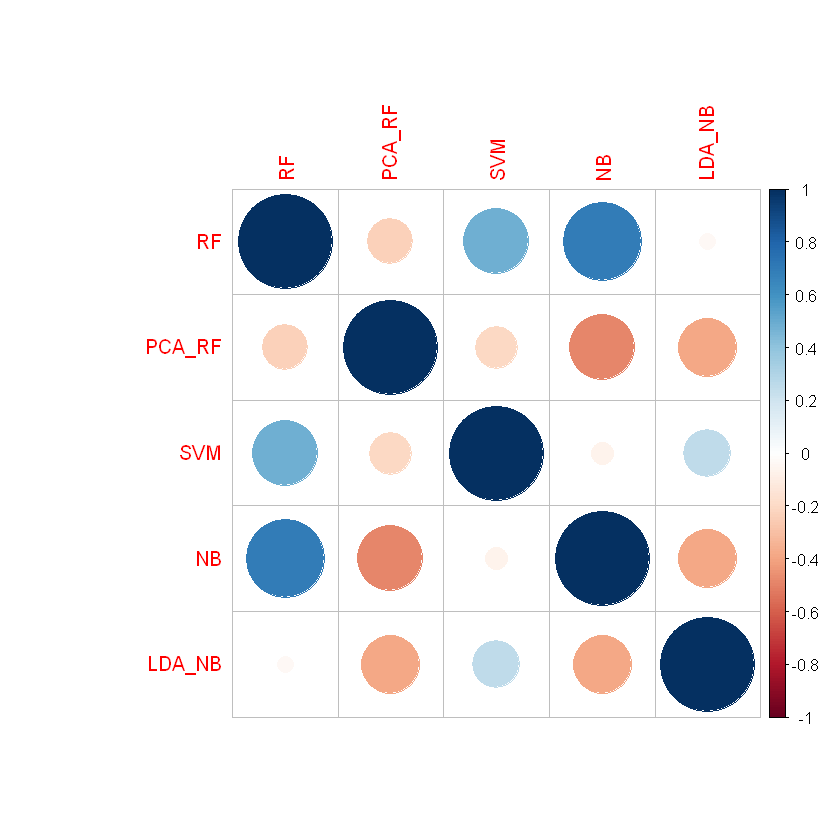

In [72]:
corrplot(model_cor)

# Data

In [73]:
model_cor

,RF,PCA_RF,SVM,NB,LDA_NB
RF,1.00000000,-0.2323998,0.48801371,0.69026035,-0.03137916
PCA_RF,-0.23239980,1.0000000,-0.20762128,-0.48320090,-0.38048045
SVM,0.48801371,-0.2076213,1.00000000,-0.06044539,0.25483784
NB,0.69026035,-0.4832009,-0.06044539,1.00000000,-0.38120762
LDA_NB,-0.03137916,-0.3804804,0.25483784,-0.38120762,1.00000000


# Comparasion

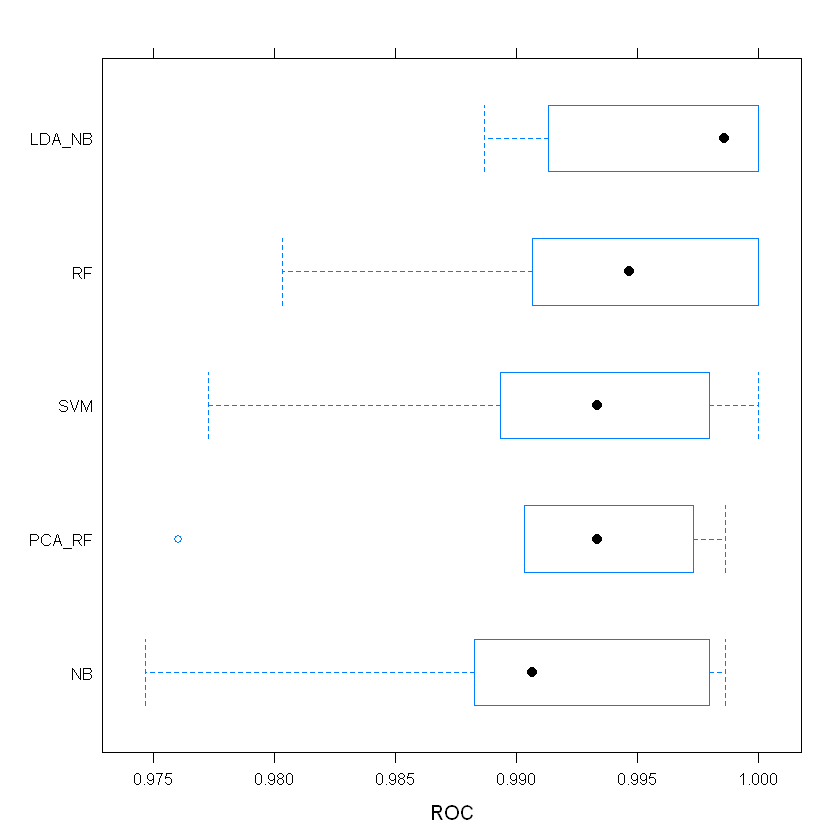

In [77]:
bwplot(resamples, metric="ROC")

__We see here that some models have a great variability depending of the processed sample (NB). The models LDA_NNET, and LDA_NB achieve a great auc with some variability.__

__The ROC metric measure the auc of the roc curve of each model. This metric is independent of any threshold. Let’s remember how these models result with the testing dataset. Prediction classes are obtained by default with a threshold of 0.5 which could not be the best with an unbalanced dataset like this.__

In [78]:
cm_list <- list(RF=cm_rf, PCA_RF=cm_pca_rf,SVM=cm_svm, NB=cm_nb, LDA_NB=cm_lda_nb)

In [79]:
cm_list_results <- sapply(cm_list, function(x) x$byClass)
cm_list_results

,RF,PCA_RF,SVM,NB,LDA_NB
Sensitivity,0.9047619,0.8253968,0.9365079,0.8412698,0.9365079
Specificity,0.9906542,1.0000000,0.9906542,0.9532710,1.0000000
Pos Pred Value,0.9827586,1.0000000,0.9833333,0.9137931,1.0000000
Neg Pred Value,0.9464286,0.9067797,0.9636364,0.9107143,0.9639640
Precision,0.9827586,1.0000000,0.9833333,0.9137931,1.0000000
Recall,0.9047619,0.8253968,0.9365079,0.8412698,0.9365079
F1,0.9421488,0.9043478,0.9593496,0.8760331,0.9672131
Prevalence,0.3705882,0.3705882,0.3705882,0.3705882,0.3705882
Detection Rate,0.3352941,0.3058824,0.3470588,0.3117647,0.3470588
Detection Prevalence,0.3411765,0.3058824,0.3529412,0.3411765,0.3470588


In [92]:
cm_results_max <- apply(cm_list_results, 1, which.max)
cm_results_max

Sensitivity          Specificity       Pos Pred Value 
                   3                    2                    2 
      Neg Pred Value            Precision               Recall 
                   5                    2                    3 
                  F1           Prevalence       Detection Rate 
                   5                    1                    3 
Detection Prevalence    Balanced Accuracy 
                   3                    5

In [96]:
cm_results_max <- apply(cm_list_results, 1, max)
cm_results_max

Sensitivity          Specificity       Pos Pred Value 
           0.9365079            1.0000000            1.0000000 
      Neg Pred Value            Precision               Recall 
           0.9639640            1.0000000            0.9365079 
                  F1           Prevalence       Detection Rate 
           0.9672131            0.3705882            0.3470588 
Detection Prevalence    Balanced Accuracy 
           0.3529412            0.9682540

In [93]:
colnames(cm_list_results)[cm_results_max]

[1] "SVM"    "PCA_RF" "PCA_RF" "LDA_NB" "PCA_RF" "SVM"    "LDA_NB" "RF"    
 [9] "SVM"    "SVM"    "LDA_NB"

In [99]:
 value=mapply(function(x,y) {cm_list_results[x,y]}, 
                            names(cm_results_max),cm_results_max)
 value

$Sensitivity
numeric(0)

$Specificity
[1] 0.9906542

$`Pos Pred Value`
[1] 0.9827586

$`Neg Pred Value`
numeric(0)

$Precision
[1] 0.9827586

$Recall
numeric(0)

$F1
numeric(0)

$Prevalence
numeric(0)

$`Detection Rate`
numeric(0)

$`Detection Prevalence`
numeric(0)

$`Balanced Accuracy`
numeric(0)

In [101]:
cm_results_max

Sensitivity          Specificity       Pos Pred Value 
           0.9365079            1.0000000            1.0000000 
      Neg Pred Value            Precision               Recall 
           0.9639640            1.0000000            0.9365079 
                  F1           Prevalence       Detection Rate 
           0.9672131            0.3705882            0.3470588 
Detection Prevalence    Balanced Accuracy 
           0.3529412            0.9682540

In [95]:
output_report <- data.frame(metric=names(cm_results_max), 
                            best_model=colnames(cm_list_results)[cm_results_max],
                            value=mapply(function(x,y) {cm_list_results[x,y]}, 
                            names(cm_results_max), 
                            cm_results_max))
rownames(output_report) <- NULL
output_report


metric,best_model,value
<chr>,<chr>,<dbl>
Sensitivity,SVM,0.9365079
Specificity,PCA_RF,1.0000000
Pos Pred Value,PCA_RF,1.0000000
Neg Pred Value,LDA_NB,0.9639640
Precision,PCA_RF,1.0000000
Recall,SVM,0.9365079
F1,LDA_NB,0.9672131
Prevalence,RF,0.3705882
Detection Rate,SVM,0.3470588


# Conclusions

# We have found a model based on svm and LDA preprocessed data with good results over the test set. This model has a sensibility of 0.9365 with a F1 score of 0.9672